In [1]:
using Plots

In [3]:
#Get Final Size for SIR Model
@fastmath function getSIR_final_size(N,β,γ)
    final_size = zeros(N+1,1);
    final_size[2] = 1;
    for Z2 in 0:N
        @inbounds for Z1 in Z2+1:N-1
            p1 = 1 / ( 1 + γ/(β*(N-Z1)));
            final_size[Z1+2] = final_size[Z1+2] + final_size[Z1+1]*p1; 
            final_size[Z1+1] = final_size[Z1+1]*(1-p1);
        end
    end
    return final_size;
end

getSIR_final_size (generic function with 1 method)

In [4]:
#Sample Size
N = 20;       
#Infected per-Capita Rate
β = 2/(N-1);
#Recover per-capita rate
γ = 1.0;

In [5]:
#Get Final Size for SIR Model
final_size = getSIR_final_size(N,β,γ);

In [6]:
#Get Time Final Size Function
@time final_size = getSIR_final_size(N,β,γ);

  0.000013 seconds (5 allocations: 416 bytes)


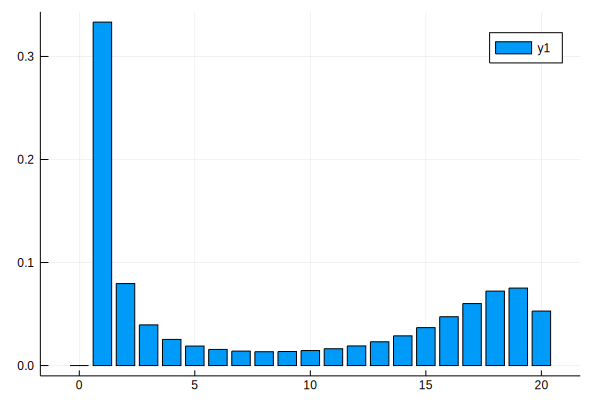

In [7]:
bar(0:N,final_size)

In [8]:
@fastmath function getSI4R_final_size(N::Int64,β::Float64,γ::Float64)
    Psi = (N+1)*(N+2)*(N+3)*(N+4)/24;
    p_vec = zeros(Float64,Int(Psi),1);
    p_vec[2]=1;
    @inbounds for Z5 in 0:N
        w::Int64 = Psi - (N-Z5+1)*(N-Z5+2)*(N-Z5+3)*(N-Z5+4)/24 + 1; 
        @inbounds for Z4 in Z5:N
            a5 = 4*γ*(Z4-Z5);
            @inbounds for Z3 in Z4:N
                a4 = 4*γ*(Z3-Z4);
                @inbounds for Z2 in Z3:N;
                    a3 = 4*γ*(Z2-Z3);            
                    @inbounds for Z1 in Z2:N
                    a1 = β*(N-Z1)*(Z1-Z5);   
                    a2 = 4*γ*(Z1-Z2);
                    tot = a1+a2+a3+a4+a5;
                    if Z1-Z5 == 0
                        final_size[Z5+1] = p_vec[w];
                    end
                    if a1 > 0
                       p_vec[w+1] = p_vec[w+1]+ p_vec[w]*a1/tot;
                    end
                    if a2 > 0
                        p_vec[w+N-Z2] = p_vec[w+N-Z2]+ p_vec[w]*a2/tot;
                    end
                    if a3 > 0
                        place3::Int64 = (N-Z3)*(N-Z3+1)/2;
                        p_vec[w+place3] = p_vec[w+place3]+ p_vec[w]*a3/tot;
                    end
                    if a4 > 0
                        place4::Int64 = (N-Z4)*(N-Z4+1)*(N-Z4+2)/6; 
                        p_vec[w+place4] = p_vec[w+place4] + p_vec[w]*a4/tot;
                    end
                    if a5 > 0
                        p_vec[w] = p_vec[w]*a5/tot;
                    end
                    w = w + 1;
                end
            end
        end
    end
end
    return final_size
end

getSI4R_final_size (generic function with 1 method)

In [9]:
#Get Final Size for SI(4)R model
final_size = getSI4R_final_size(N,β,γ);

In [10]:
#Get Run time of SI(4)R Final Size Model
@time final_size = getSI4R_final_size(N,β,γ);

  0.000491 seconds (27 allocations: 83.625 KiB)


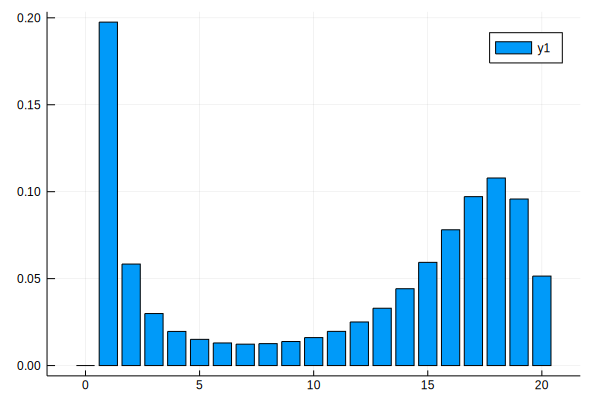

In [11]:
bar(0:N,final_size)